<a href="https://colab.research.google.com/github/MikhailSamuel/My-Projects/blob/main/Sleeping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.54k/2.54k [00:00<00:00, 4.75MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uom190346a/sleep-health-and-lifestyle-dataset/versions/2


In [ ]:
import pandas as pd
import  os

file_path = os.path.join(path, "Sleep_health_and_lifestyle_dataset.csv")
df = pd.read_csv(file_path, encoding='latin1')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [ ]:
df_sleep_disorder_present = df[df['Sleep Disorder'].notna()]
df_sleep_disorder_absent = df[df['Sleep Disorder'].isna()]

print("DataFrame with sleep disorder present (first 5 rows):")
print(df_sleep_disorder_present.head())

print("\nDataFrame with sleep disorder absent (first 5 rows):")
print(df_sleep_disorder_absent.head())

DataFrame with sleep disorder present (first 5 rows):
    Person ID  Gender  Age            Occupation  Sleep Duration  \
3           4    Male   28  Sales Representative             5.9   
4           5    Male   28  Sales Representative             5.9   
5           6    Male   28     Software Engineer             5.9   
6           7    Male   29               Teacher             6.3   
16         17  Female   29                 Nurse             6.5   

    Quality of Sleep  Physical Activity Level  Stress Level   BMI Category  \
3                  4                       30             8          Obese   
4                  4                       30             8          Obese   
5                  4                       30             8          Obese   
6                  6                       40             7          Obese   
16                 5                       40             7  Normal Weight   

   Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
3       

Visualizing numerical columns in df_sleep_disorder_absent:


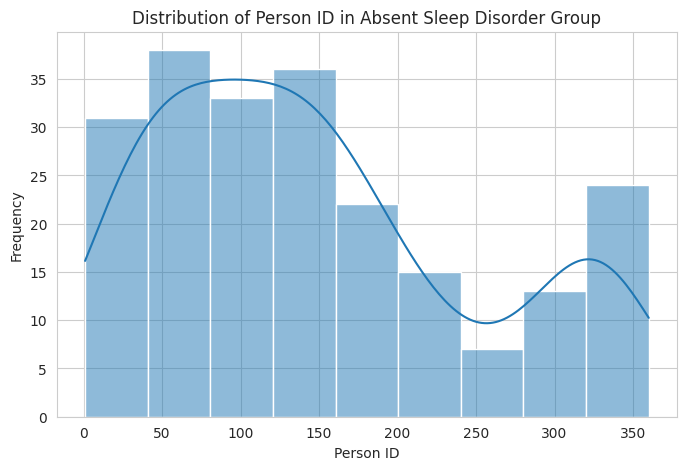

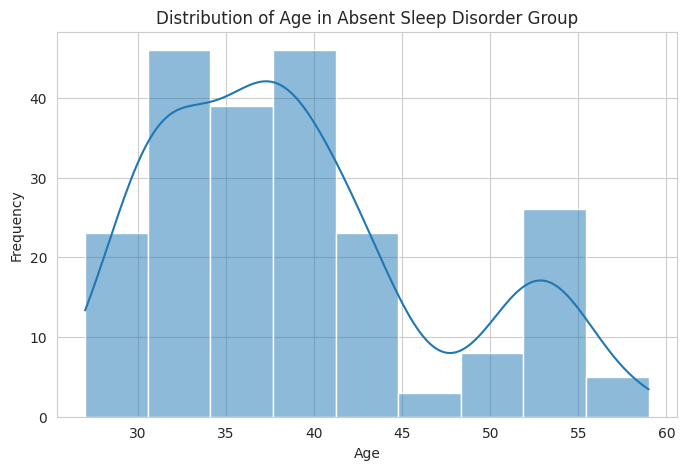

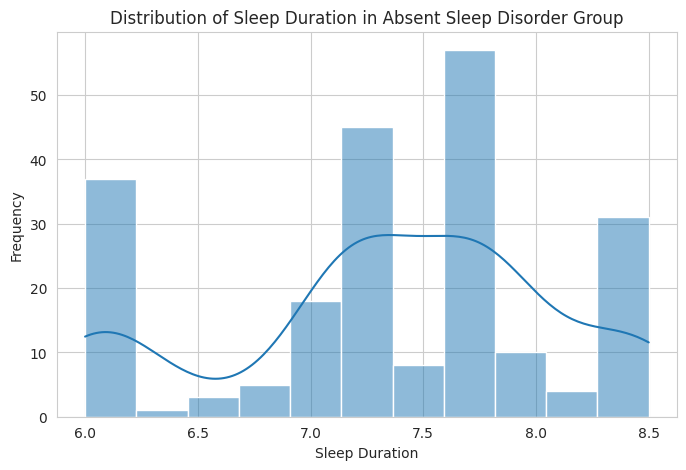

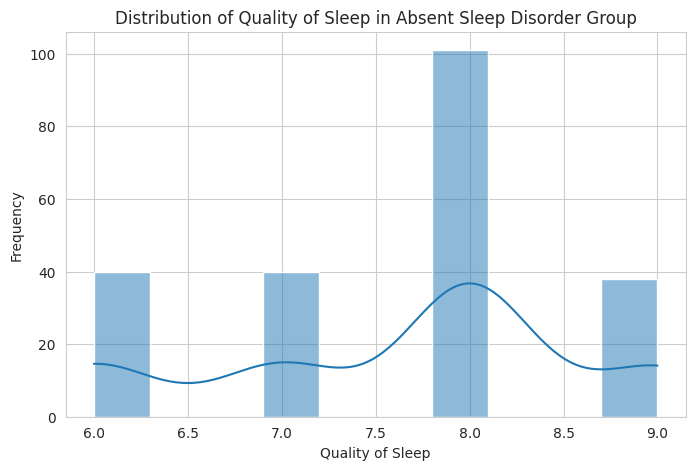

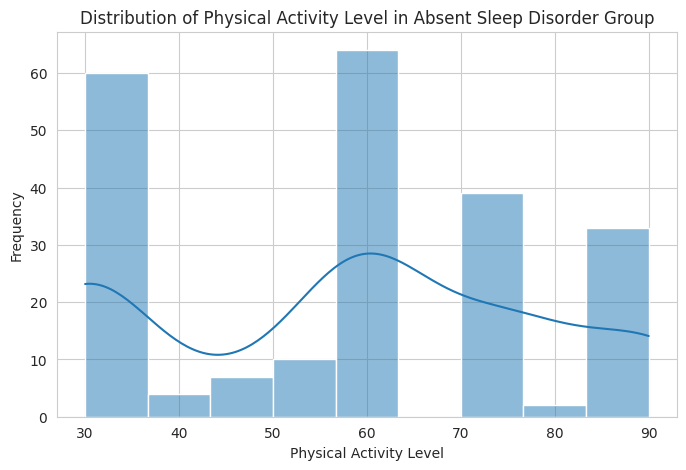

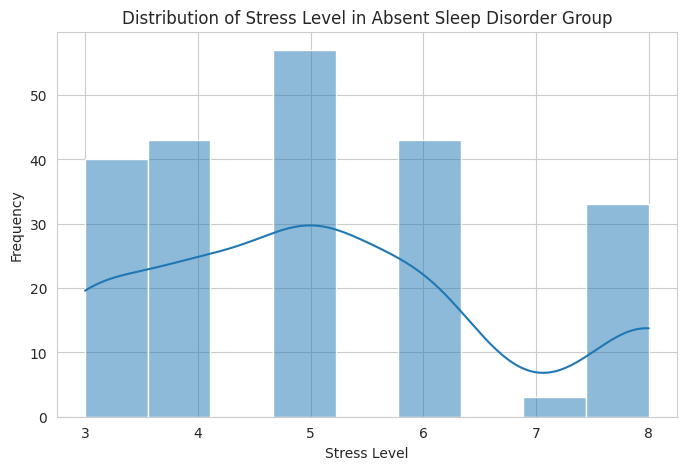

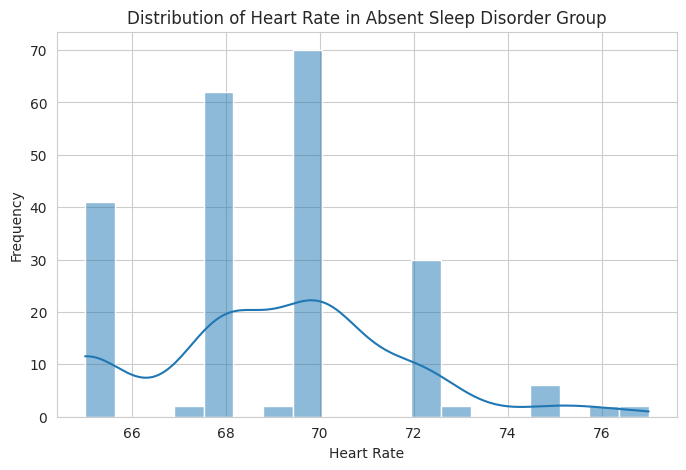

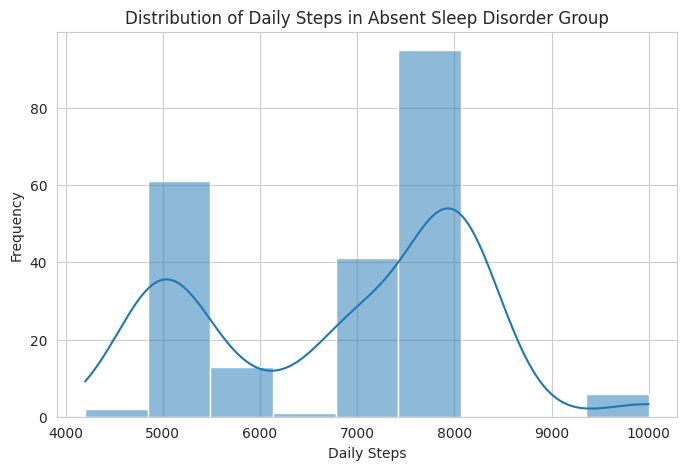


Visualizing categorical columns in df_sleep_disorder_absent:


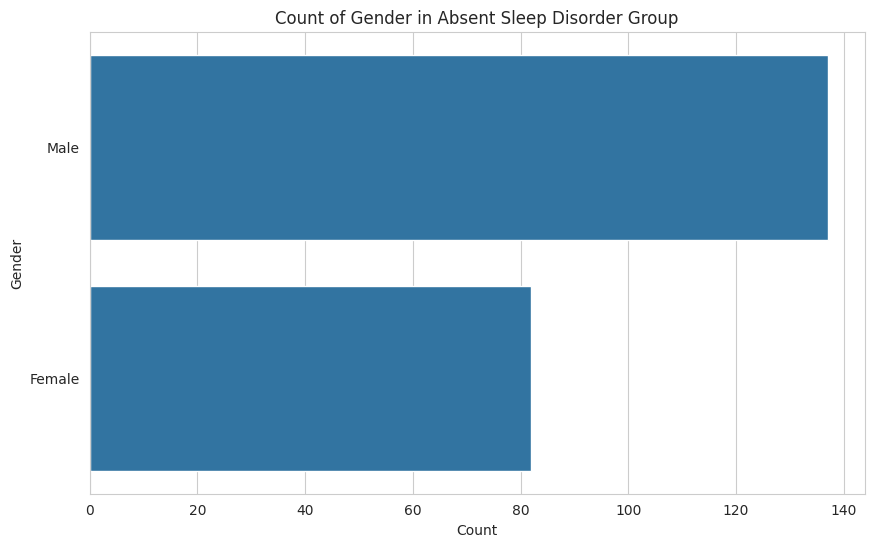

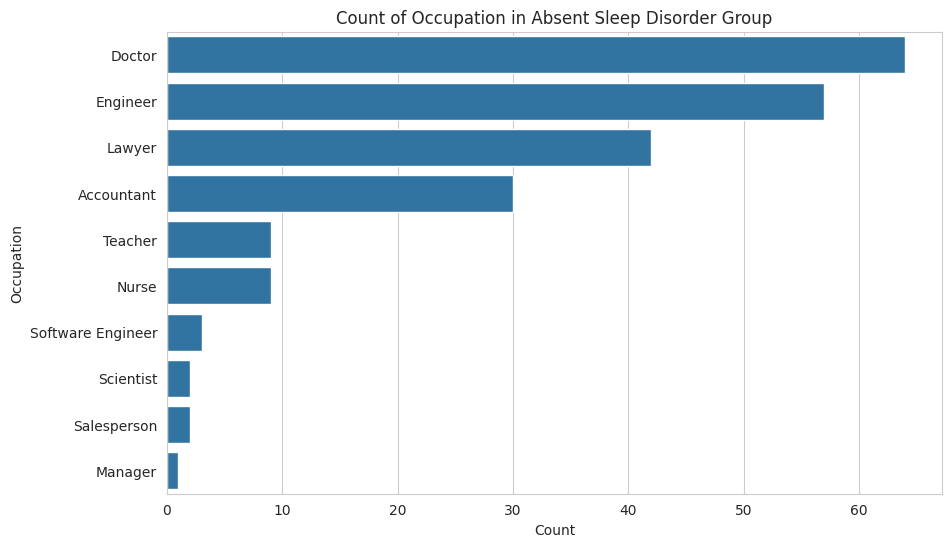

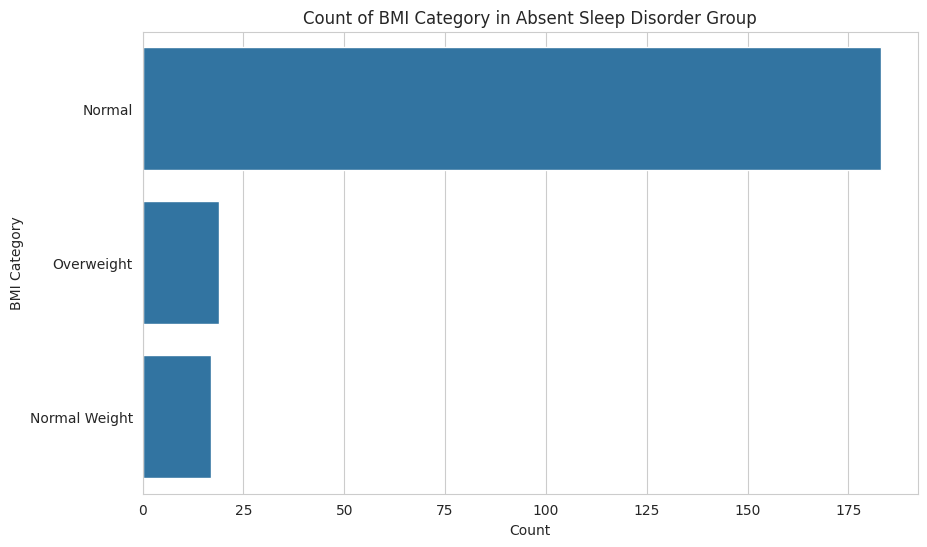

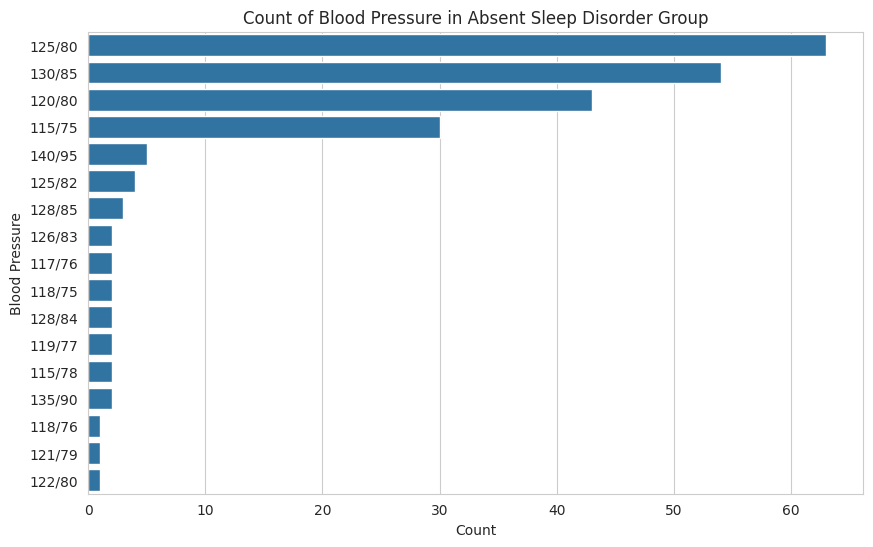

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Identify numerical and categorical columns in df_sleep_disorder_absent
numerical_cols_absent = df_sleep_disorder_absent.select_dtypes(include=['int64', 'float64']).columns
categorical_cols_absent = df_sleep_disorder_absent.select_dtypes(include=['object']).columns

print("Visualizing numerical columns in df_sleep_disorder_absent:")
for col in numerical_cols_absent:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_sleep_disorder_absent[col], kde=True)
    plt.title(f'Distribution of {col} in Absent Sleep Disorder Group')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

print("\nVisualizing categorical columns in df_sleep_disorder_absent:")
for col in categorical_cols_absent:
    # Skip 'Sleep Disorder' itself as it will only contain NaN (or 'No Sleep Disorder' if already filled)
    if col == 'Sleep Disorder':
        continue
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df_sleep_disorder_absent[col], order = df_sleep_disorder_absent[col].value_counts().index)
    plt.title(f'Count of {col} in Absent Sleep Disorder Group')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

Visualizing numerical columns in df_sleep_disorder_present:


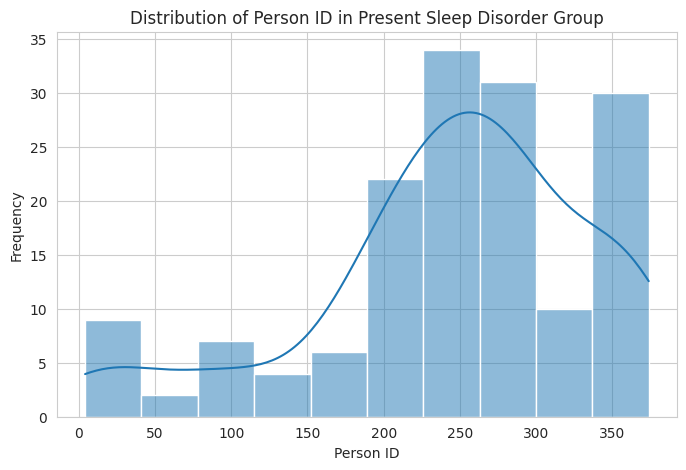

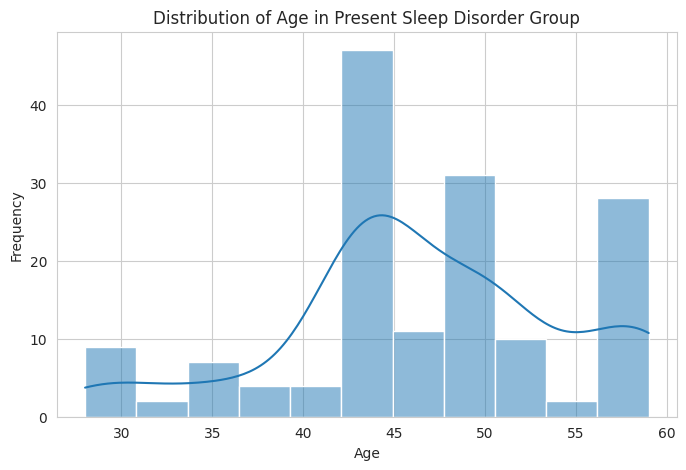

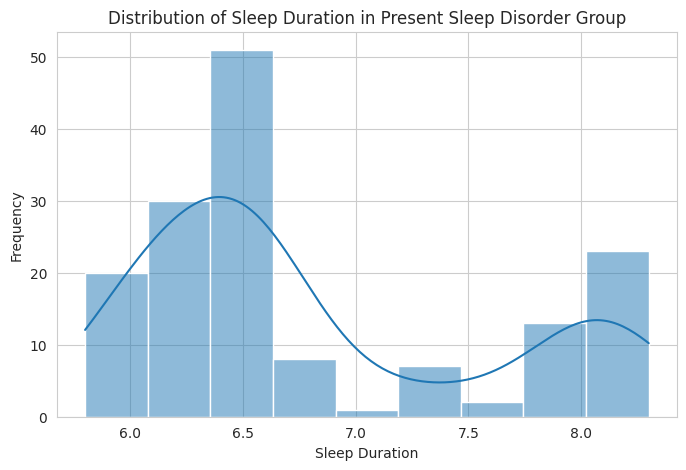

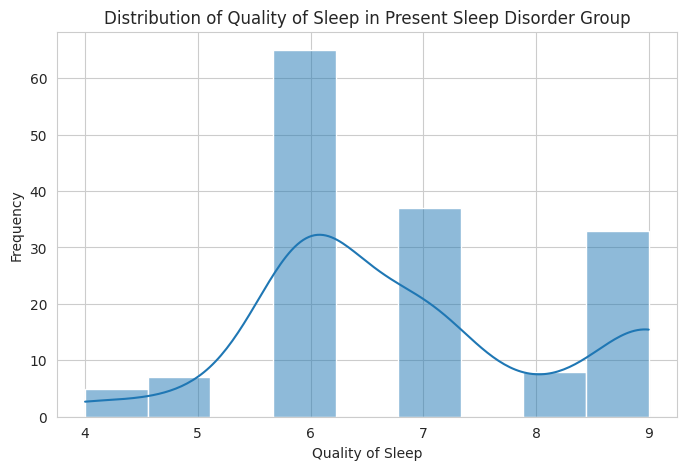

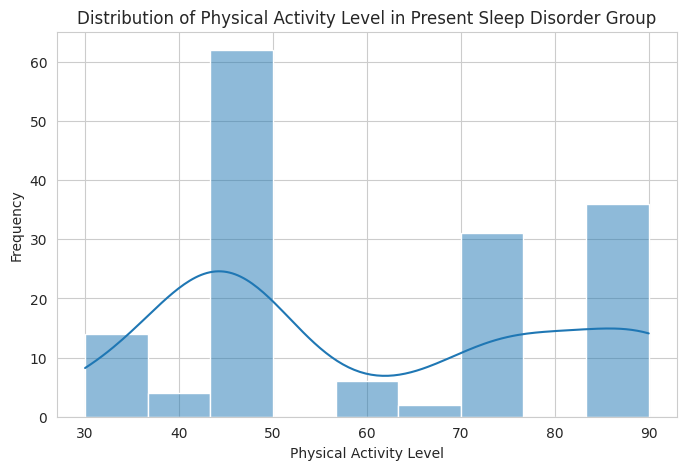

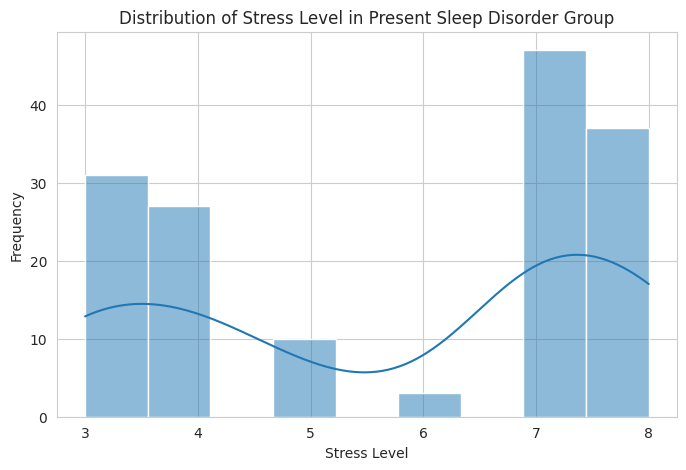

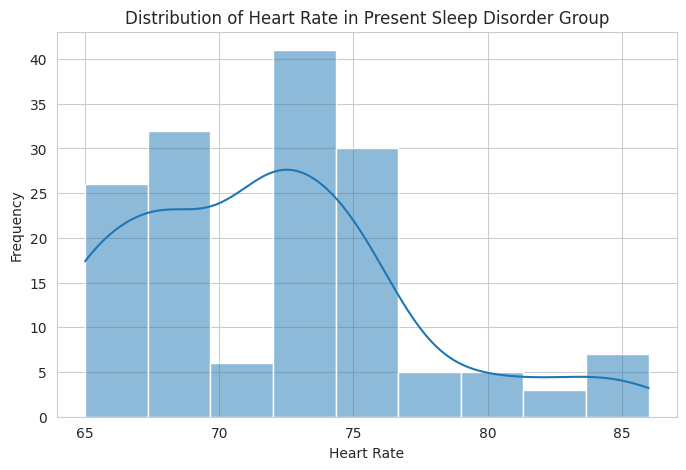

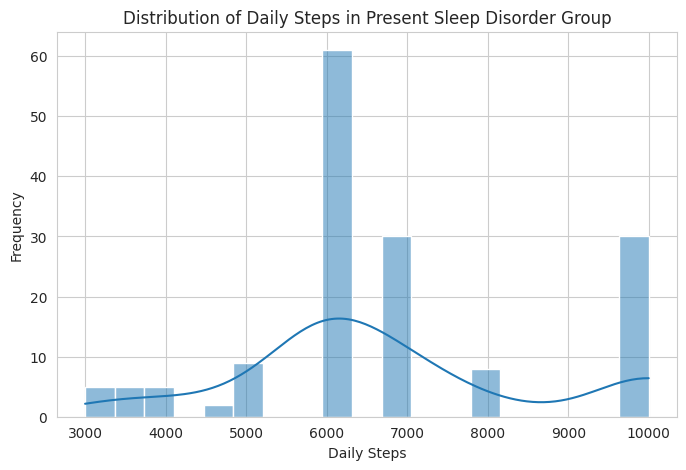


Visualizing categorical columns in df_sleep_disorder_present:


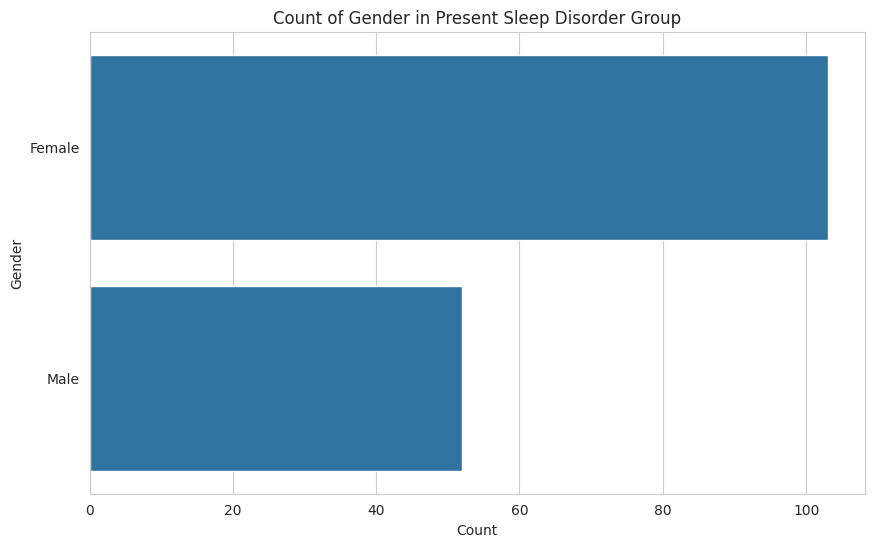

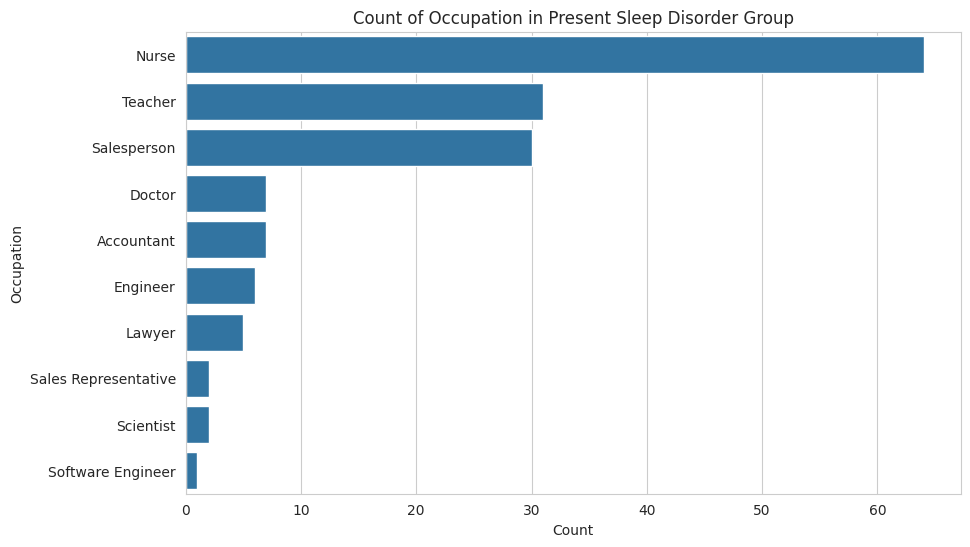

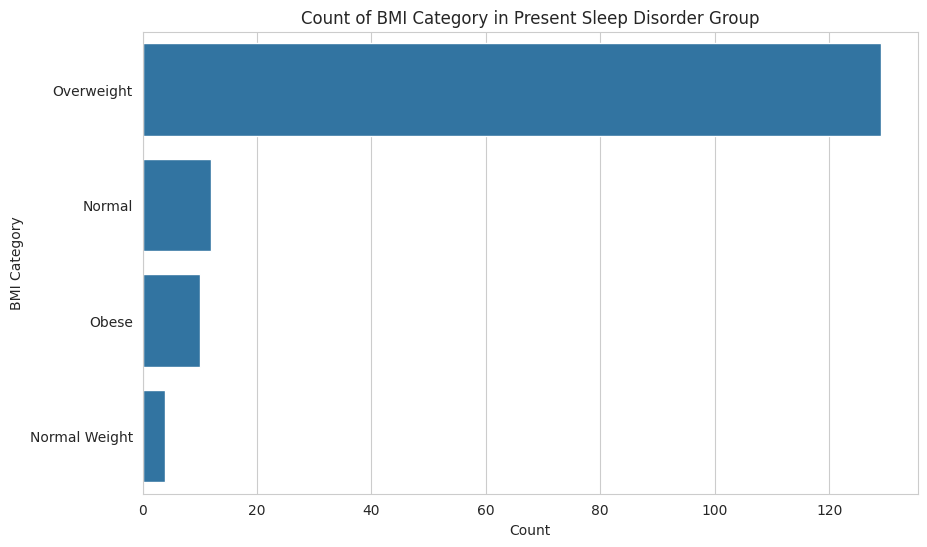

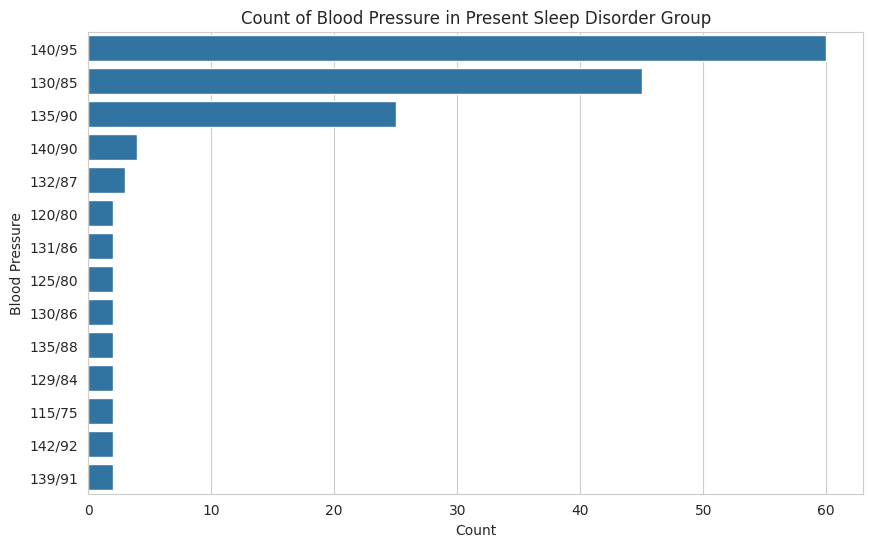

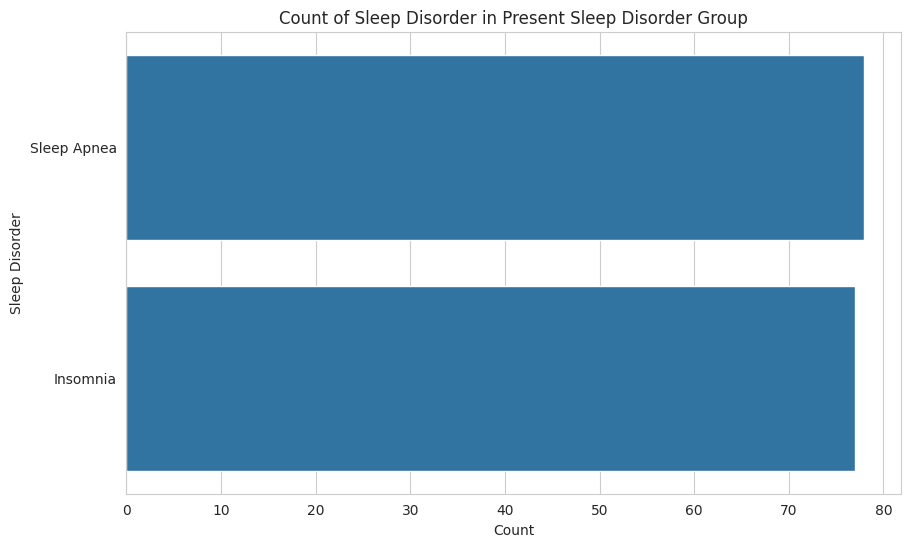

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Identify numerical and categorical columns in df_sleep_disorder_present
numerical_cols_present = df_sleep_disorder_present.select_dtypes(include=['int64', 'float64']).columns
categorical_cols_present = df_sleep_disorder_present.select_dtypes(include=['object']).columns

print("Visualizing numerical columns in df_sleep_disorder_present:")
for col in numerical_cols_present:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_sleep_disorder_present[col], kde=True)
    plt.title(f'Distribution of {col} in Present Sleep Disorder Group')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

print("\nVisualizing categorical columns in df_sleep_disorder_present:")
for col in categorical_cols_present:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df_sleep_disorder_present[col], order = df_sleep_disorder_present[col].value_counts().index)
    plt.title(f'Count of {col} in Present Sleep Disorder Group')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

## Prepare Data for Modeling

### Subtask:
Handle categorical features by encoding them into numerical representations suitable for machine learning models. This includes the 'Gender', 'Occupation', 'BMI Category', and the 'Sleep Disorder' target variable, which now includes 'No Sleep Disorder' (effectively the 'unknown' category).


**Reasoning**:
The first instruction is to fill the missing values in the 'Sleep Disorder' column with 'No Sleep Disorder'. This is a crucial step before encoding the target variable, as it effectively creates a new category for individuals without a diagnosed sleep disorder.



In [ ]:
df['Sleep Disorder'].fillna('No Sleep Disorder', inplace=True)
print("Unique values in 'Sleep Disorder' after filling NaNs:")
print(df['Sleep Disorder'].unique())

Unique values in 'Sleep Disorder' after filling NaNs:
['No Sleep Disorder' 'Sleep Apnea' 'Insomnia']


/tmp/ipython-input-3962907359.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('No Sleep Disorder', inplace=True)


**Reasoning**:
The next step is to encode the categorical features 'Gender', 'Occupation', and 'BMI Category' using one-hot encoding, and the 'Sleep Disorder' target variable using label encoding, as specified in the instructions. This will prepare the data for machine learning models by converting all features into a numerical format.



In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# One-hot encode 'Gender', 'Occupation', and 'BMI Category'
df_encoded = pd.get_dummies(df, columns=['Gender', 'Occupation', 'BMI Category'], drop_first=True)

# Convert boolean columns (created by get_dummies) to integers (0 or 1)
for col in df_encoded.select_dtypes(include='bool').columns:
    df_encoded[col] = df_encoded[col].astype(int)

# Label encode 'Sleep Disorder' column
le = LabelEncoder()
y = le.fit_transform(df_encoded['Sleep Disorder'])

# Prepare feature set X by dropping original categorical columns and the target column
X = df_encoded.drop(columns=['Person ID', 'Sleep Disorder'])

# Print the shapes of X and y to verify
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)
print("First 5 rows of X:")
print(X.head())
print("First 5 values of y:")
print(y[:5])

Shape of X (features): (374, 22)
Shape of y (target): (374,)
First 5 rows of X:
   Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0   27             6.1                 6                       42   
1   28             6.2                 6                       60   
2   28             6.2                 6                       60   
3   28             5.9                 4                       30   
4   28             5.9                 4                       30   

   Stress Level Blood Pressure  Heart Rate  Daily Steps  Gender_Male  \
0             6         126/83          77         4200            1   
1             8         125/80          75        10000            1   
2             8         125/80          75        10000            1   
3             8         140/90          85         3000            1   
4             8         140/90          85         3000            1   

   Occupation_Doctor  ...  Occupation_Manager  Occupation_Nurse  \
0    

## Split Data into Training and Testing Sets

### Subtask:
Divide the processed dataset (features X and target y) into training and testing sets to evaluate the model's performance on unseen data.


In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Function to split Blood Pressure into Systolic and Diastolic
def split_blood_pressure(df):
    bp_split = df['Blood Pressure'].str.split('/', expand=True)
    df['Systolic Blood Pressure'] = pd.to_numeric(bp_split[0])
    df['Diastolic Blood Pressure'] = pd.to_numeric(bp_split[1])
    df = df.drop(columns=['Blood Pressure'])
    return df

# Re-split data into training and testing sets to ensure 'Blood Pressure' column is present
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the function to X_train and X_test
X_train = split_blood_pressure(X_train.copy())
X_test = split_blood_pressure(X_test.copy())

# Identify numerical columns for scaling
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                  'Stress Level', 'Heart Rate', 'Daily Steps',
                  'Systolic Blood Pressure', 'Diastolic Blood Pressure']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical columns in X_train and X_test
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Instantiate the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Print the trained model object to verify
print("Trained Logistic Regression model:")
print(log_reg_model)

Trained Logistic Regression model:
LogisticRegression(max_iter=1000, random_state=42)


## Evaluate Model Performance

### Subtask:
Assess the trained model's performance on the test set using appropriate classification metrics such as accuracy, precision, recall, and F1-score. A confusion matrix can also be visualized to see how well the model distinguishes between all three classes.


In [ ]:
y_pred = log_reg_model.predict(X_test)
print("Predictions made on the test set.")

Predictions made on the test set.


Accuracy: 0.9067
Weighted Precision: 0.9077
Weighted Recall: 0.9067
Weighted F1-score: 0.9048


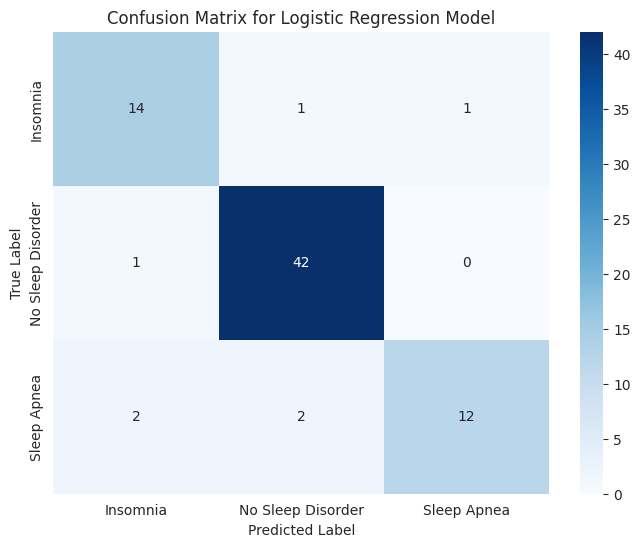

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate and print precision, recall, and F1-score for each class
# Ensure `le` (LabelEncoder) is available from previous steps to get class names
class_names = le.classes_

precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model using the training data
naive_bayes_model.fit(X_train, y_train)

print("Gaussian Naive Bayes model trained successfully.")

Gaussian Naive Bayes model trained successfully.


In [ ]:
y_pred_nb = naive_bayes_model.predict(X_test)
print("Predictions made on the test set using Gaussian Naive Bayes model.")

Predictions made on the test set using Gaussian Naive Bayes model.


Gaussian Naive Bayes Accuracy: 0.7467
Gaussian Naive Bayes Weighted Precision: 0.8192
Gaussian Naive Bayes Weighted Recall: 0.7467
Gaussian Naive Bayes Weighted F1-score: 0.7644


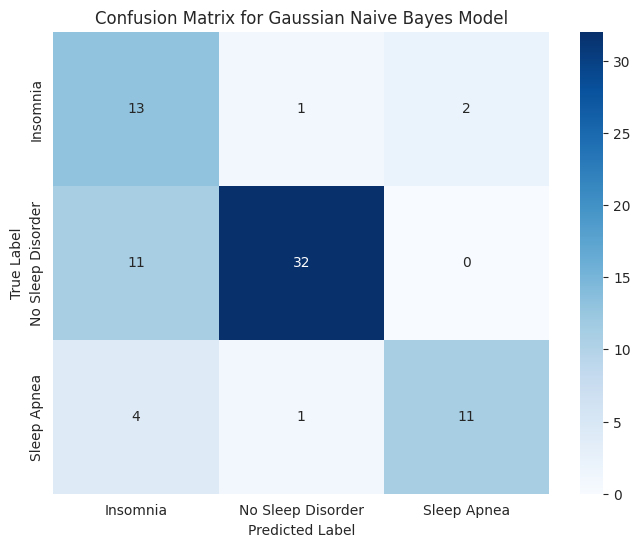

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate and print accuracy for Gaussian Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Gaussian Naive Bayes Accuracy: {accuracy_nb:.4f}")

# Calculate and print precision, recall, and F1-score for Gaussian Naive Bayes
class_names = le.classes_ # Reusing class_names from previous LabelEncoder

precision_nb = precision_score(y_test, y_pred_nb, average='weighted', zero_division=0)
recall_nb = recall_score(y_test, y_pred_nb, average='weighted', zero_division=0)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted', zero_division=0)

print(f"Gaussian Naive Bayes Weighted Precision: {precision_nb:.4f}")
print(f"Gaussian Naive Bayes Weighted Recall: {recall_nb:.4f}")
print(f"Gaussian Naive Bayes Weighted F1-score: {f1_nb:.4f}")

# Generate confusion matrix for Gaussian Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plotting the confusion matrix for Gaussian Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Gaussian Naive Bayes Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model
knn_model = KNeighborsClassifier()

# Train the model using the training data
knn_model.fit(X_train, y_train)

print("K-Nearest Neighbors model trained successfully.")

K-Nearest Neighbors model trained successfully.


In [ ]:
y_pred_knn = knn_model.predict(X_test)
print("Predictions made on the test set using K-Nearest Neighbors model.")

Predictions made on the test set using K-Nearest Neighbors model.


K-Nearest Neighbors Accuracy: 0.8800
K-Nearest Neighbors Weighted Precision: 0.8819
K-Nearest Neighbors Weighted Recall: 0.8800
K-Nearest Neighbors Weighted F1-score: 0.8785


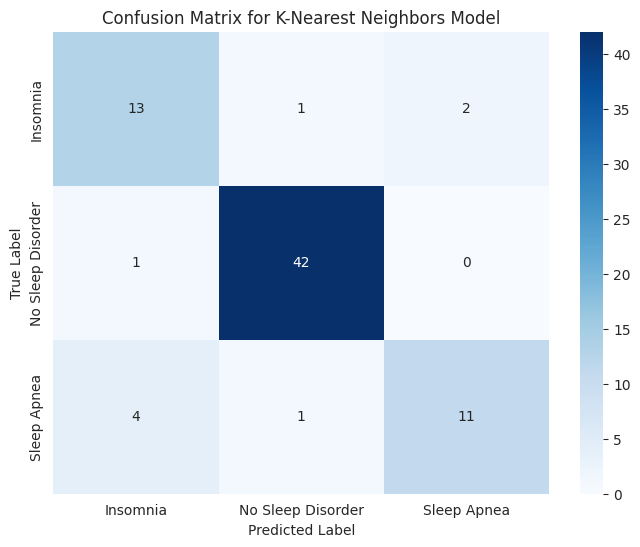

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate and print accuracy for K-Nearest Neighbors
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}")

# Calculate and print precision, recall, and F1-score for K-Nearest Neighbors
class_names = le.classes_ # Reusing class_names from previous LabelEncoder

precision_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn, average='weighted', zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)

print(f"K-Nearest Neighbors Weighted Precision: {precision_knn:.4f}")
print(f"K-Nearest Neighbors Weighted Recall: {recall_knn:.4f}")
print(f"K-Nearest Neighbors Weighted F1-score: {f1_knn:.4f}")

# Generate confusion matrix for K-Nearest Neighbors
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plotting the confusion matrix for K-Nearest Neighbors
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for K-Nearest Neighbors Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<Figure size 2000x4000 with 0 Axes>

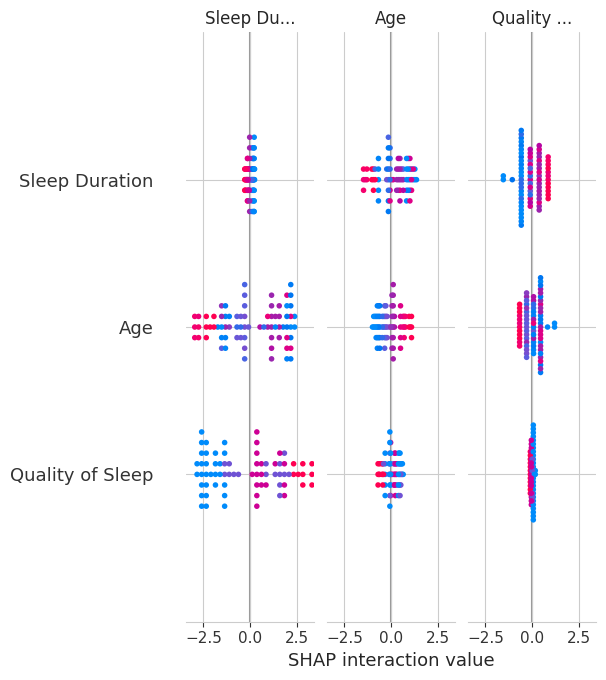

In [ ]:
import shap

# تهيئة المُفسر (Explainer) باستخدام الموديل والبيانات اللي اتدرب عليها
explainer = shap.LinearExplainer(log_reg_model, X_train)

# حساب قيم SHAP لبيانات الاختبار
shap_values = explainer.shap_values(X_test)

# رسم ملخص (Summary Plot) بيوضح تأثير كل ميزة على كل فئة من فئات النوم
plt.figure(figsize=(20, 40)) # Increased width from 12 to 20
shap.summary_plot(shap_values, X_test, feature_names=X.columns, class_names=le.classes_)

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

# 1. تحديد الفئة اللي عايزين نشرحها (بما إننا عندنا 3 فئات)
# رقم 0 أو 1 أو 2 (تقدر تغير الرقم ده عشان تشوف تأثير العوامل على كل مرض لوحده)
class_idx = 0
target_class_name = le.classes_[class_idx]

# 2. استخراج قيم SHAP الصحيحة للفئة المختارة (يجب أن تكون 2D)
# shap_values هو np.ndarray بالشكل (عدد العينات, عدد الميزات, عدد الفئات)
# لذا نستخدم [:, :, class_idx] للحصول على قيم SHAP لجميع العينات وجميع الميزات للفئة المحددة
shap_vals_to_plot = shap_values[:, :, class_idx]

# 3. تحويل قيم SHAP لجدول (DataFrame) عشان Plotly تفهمه
shap_df = pd.DataFrame(shap_vals_to_plot, columns=X_test.columns)
shap_melted = shap_df.melt(var_name='Feature', value_name='SHAP Value')

# 4. دمج قيم البيانات الأصلية (عشان نلون النقط: أحمر للقيم العالية وأزرق للقيم المنخفضة)
X_test_reset = X_test.reset_index(drop=True)
# توحيد مقياس البيانات بين 0 و 1 لضبط تدرج الألوان
X_test_norm = (X_test_reset - X_test_reset.min()) / (X_test_reset.max() - X_test_reset.min() + 1e-9)
X_test_melted = X_test_norm.melt(var_name='Feature', value_name='Feature Value')

shap_melted['Feature Value'] = X_test_melted['Feature Value']

# 5. رسم المخطط التفاعلي (Interactive Strip Plot)
fig = px.scatter(
    shap_melted,
    x='SHAP Value',
    y='Feature',
    color='Feature Value',
    color_continuous_scale='RdBu_r', # تدرج الألوان: أحمر (عالي) إلى أزرق (قليل)
    orientation='h',
    title=f'Interactive SHAP Summary for Class: <b>{target_class_name}</b>'
)

# 6. تحسين المظهر ليناسب البرزنتيشن
fig.update_layout(
    yaxis={'categoryorder': 'total ascending'}, # الترتيب حسب الأهمية
    xaxis_title="SHAP Value (Impact on Model Prediction)",
    yaxis_title="Features",
    template='plotly_white',
    height=700,
    coloraxis_colorbar=dict(title="Feature Value<br>(Red=High, Blue=Low)")
)

# عرض الرسمة
fig.show()

## Summary:

### Data Analysis Key Findings

*   **Initial SHAP Extraction Issue**: The original code failed to correctly extract SHAP values from the 3D `shap_values` array (shape `(n_samples, n_features, n_classes)`), leading to errors when attempting to create a DataFrame or plot.
*   **Correct SHAP Value Slicing**: The issue was resolved by slicing the `shap_values` array using `shap_values[:, :, class_idx]`, which successfully extracted a 2D array of shape `(n_samples, n_features)` for the specified class.
*   **Plotting Function Incompatibility**: An initial attempt to plot using `plotly.express.strip` resulted in a `TypeError` due to its incompatibility with the `color_continuous_scale` argument.
*   **Plotting Function Correction**: The plotting function was changed to `plotly.express.scatter`, which successfully generated an interactive summary plot, allowing for continuous coloring based on feature values.
*   **Interactive Visualization Enabled**: The corrected code successfully produced an interactive Plotly scatter plot that visualizes SHAP values for a selected class, with points colored to indicate the original feature values (red for high, blue for low).

### Insights or Next Steps

*   The interactive SHAP summary plot provides a valuable tool for understanding how individual features influence the model's prediction for a specific class, highlighting both the magnitude and direction of their impact.
*   The ability to select different `class_idx` values allows for a granular exploration of feature importance and impact across all predicted classes, which is crucial for model interpretability and domain-specific insights.
